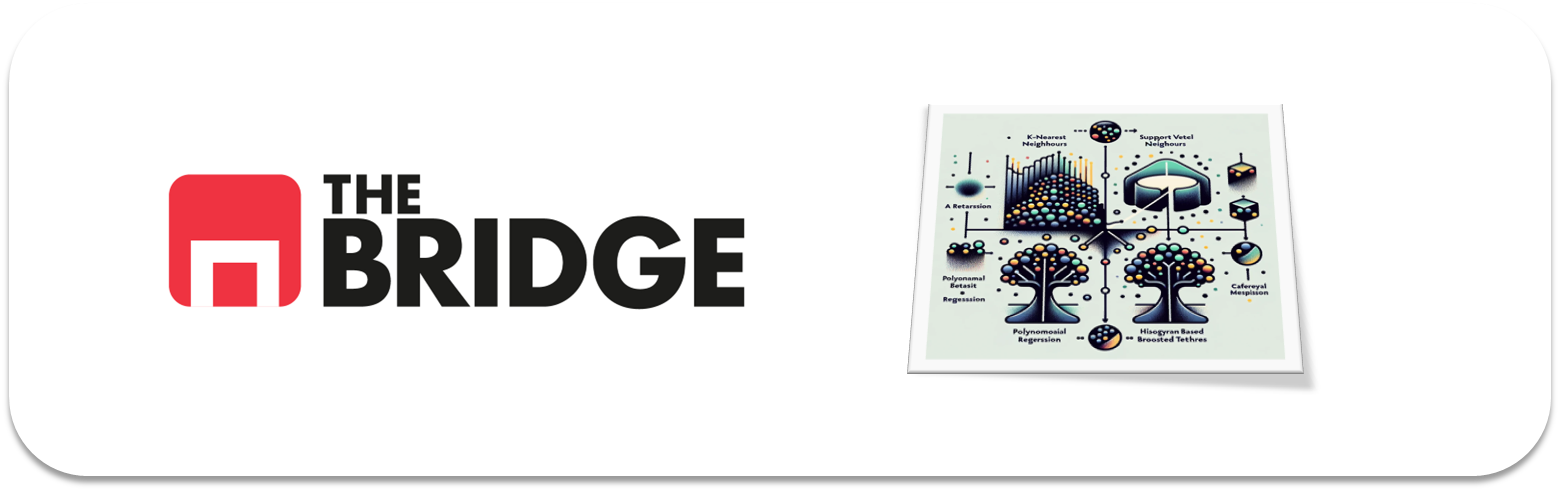

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import bootcampviztools as booty

import sys
sys.path.append('/Users/aliciamarzoa/Will/the_bridge/personal_projects/stats_help')

import dstoolbox as tlbx

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
df = pd.read_csv('./data/credit_npo.csv')
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [3]:
target = 'SeriousDlqin2yrs'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [5]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,11816.000000,12537.000000,12537.000000,12537.000000,12537.000000,12360.000000
mean,0.068916,0.330359,52.079445,0.409588,1.902253,6864.815420,8.482332,0.259312,0.999202,0.228364,0.822087
std,0.253321,0.368148,15.077498,4.055787,9.122216,11855.905437,5.165422,4.035658,1.134325,4.018873,1.136802
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030651,41.000000,0.000000,0.142268,3498.750000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163490,51.000000,0.000000,0.302025,5416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.582219,62.000000,0.000000,0.506725,8300.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,6.000000,101.000000,98.000000,99.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,10.000000


In [6]:
tlbx.describe_df(df, transpose=False)

,DATA_TYPE,NUM_MISSING,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
SeriousDlqin2yrs,int64,0,0.00,2,0.02
RevolvingUtilizationOfUnsecuredLines,float64,0,0.00,10764,85.86
age,int64,0,0.00,78,0.62
NumberOfTime30-59DaysPastDueNotWorse,int64,0,0.00,10,0.08
DebtRatio,float64,0,0.00,11547,92.10
MonthlyIncome,float64,721,5.75,4167,33.24
NumberOfOpenCreditLinesAndLoans,int64,0,0.00,43,0.34
NumberOfTimes90DaysLate,int64,0,0.00,13,0.10
NumberRealEstateLoansOrLines,int64,0,0.00,16,0.13
NumberOfTime60-89DaysPastDueNotWorse,int64,0,0.00,8,0.06


In [7]:
tlbx.tipify_variables(df, categoric_threshold=16, continuous_threshold=30)

Based on a categoric threshold of: 16
and a continuous threshold of: 30%


,nombre_variable,tipo_sugerido
0,SeriousDlqin2yrs,Binary
1,RevolvingUtilizationOfUnsecuredLines,Numerical Continuous
2,age,Numerical Discrete
3,NumberOfTime30-59DaysPastDueNotWorse,Categorical
4,DebtRatio,Numerical Continuous
5,MonthlyIncome,Numerical Continuous
6,NumberOfOpenCreditLinesAndLoans,Numerical Discrete
7,NumberOfTimes90DaysLate,Categorical
8,NumberRealEstateLoansOrLines,Categorical
9,NumberOfTime60-89DaysPastDueNotWorse,Categorical


In [8]:
df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     10500
1      1377
2       401
3       128
4        64
5        23
98       21
6        20
8         2
7         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [9]:
df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     11901
1       492
2        86
98       21
3        18
4        14
5         4
11        1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [10]:
df['NumberOfTimes90DaysLate'].value_counts()

0     11839
1       412
2       147
3        55
4        33
98       21
5        14
6         6
7         4
8         3
10        1
9         1
13        1
Name: NumberOfTimes90DaysLate, dtype: int64

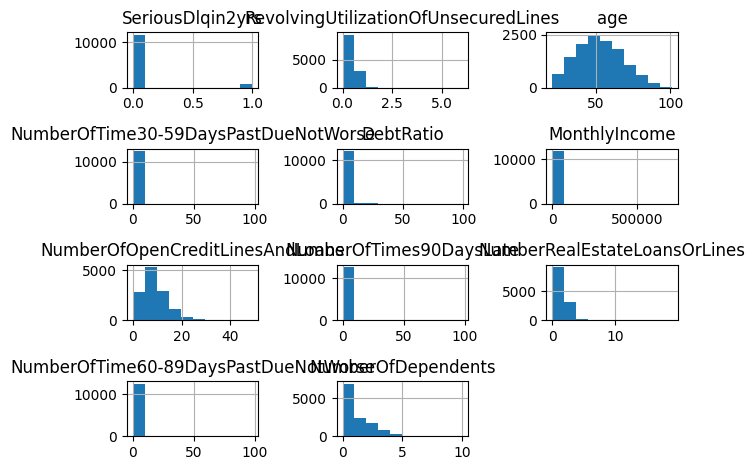

In [11]:
df.hist()
plt.tight_layout()

In [12]:
df[df['MonthlyIncome'].isna()][target].value_counts(True)

0    0.952843
1    0.047157
Name: SeriousDlqin2yrs, dtype: float64

Initial ideas:
 - treat all the Numberoftimes variables as categorical and make them binary (0 never been, 1 has been)
 - drop all NaNs?

In [13]:
df2 = df.copy()

In [14]:
df2.dropna(axis=0, inplace=True)

In [15]:
df[df['MonthlyIncome'] == 0][target].value_counts(True)

0    0.941176
1    0.058824
Name: SeriousDlqin2yrs, dtype: float64

In [16]:
len(df[df['MonthlyIncome'] == 0])

34

In [17]:
income0 = df2[df2['MonthlyIncome'] == 0].index
df2.drop(income0, axis=0, inplace=True)

In [18]:
df[df['MonthlyIncome'] == 1][target].value_counts(True)

0    1.0
Name: SeriousDlqin2yrs, dtype: float64

In [19]:
income1 = df2[df2['MonthlyIncome'] == 1].index
df2.drop(income1, axis=0, inplace=True)

In [20]:
df2.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [21]:
df[df['MonthlyIncome'].isna()][target].value_counts(True)

0    0.952843
1    0.047157
Name: SeriousDlqin2yrs, dtype: float64

- played with the idea of getting rid of the strange MonthlyIncomes
    - some entries have 0 (which is a valid scenario) but they are very few
    - some entries have 1.0
    - are these valid or errors?
    - going to get rid of them like with the isna MonthlyIncomes as they represent such a small portion of the dataset
        - the entries with MonthlyIncome = 1.0 are all 0s for target so not losing much from training value
        - entries with MonthlyIncome 0.0 are only 34 entries.
    - Still left with 721 NaNs for MonthlyIncome. No way to reasonably know what they are. Going to drop them

In [22]:
df2.dropna(axis=0, inplace=True)

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11768 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11768 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11768 non-null  float64
 2   age                                   11768 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11768 non-null  int64  
 4   DebtRatio                             11768 non-null  float64
 5   MonthlyIncome                         11768 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11768 non-null  int64  
 7   NumberOfTimes90DaysLate               11768 non-null  int64  
 8   NumberRealEstateLoansOrLines          11768 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11768 non-null  int64  
 10  NumberOfDependents                    11768 non-null  float64
dtypes: float64(4), 

In [24]:
df2['30-59DaysPast'] = df2['NumberOfTime30-59DaysPastDueNotWorse'].apply(lambda x: 1 if x > 0 else 0)
df2['60-89DaysPast'] = df2['NumberOfTime60-89DaysPastDueNotWorse'].apply(lambda x: 1 if x > 0 else 0)
df2['90DaysPast'] = df2['NumberOfTimes90DaysLate'].apply(lambda x: 1 if x > 0 else 0)

In [25]:
droppers = ['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate']
df2.drop(droppers, axis=1, inplace=True)

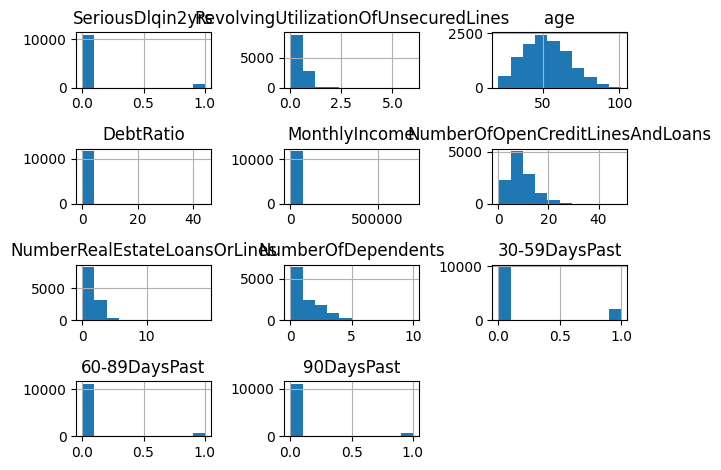

In [26]:
df2.hist()
plt.tight_layout()

In [27]:
df2.columns.to_list()

['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents',
 '30-59DaysPast',
 '60-89DaysPast',
 '90DaysPast']

In [28]:
num_features = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines']

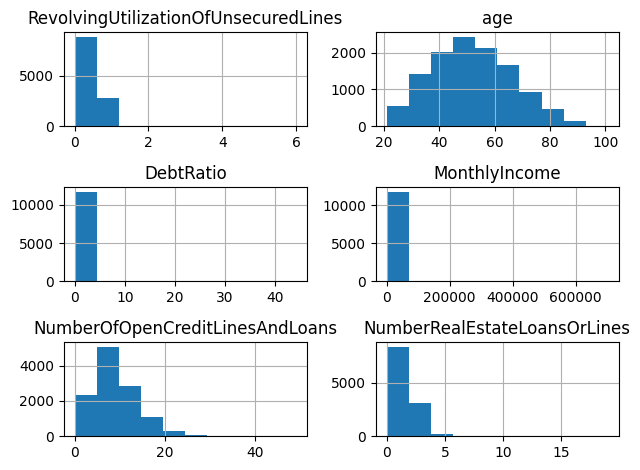

In [29]:
df2[num_features].hist()
plt.tight_layout()

<Axes: >

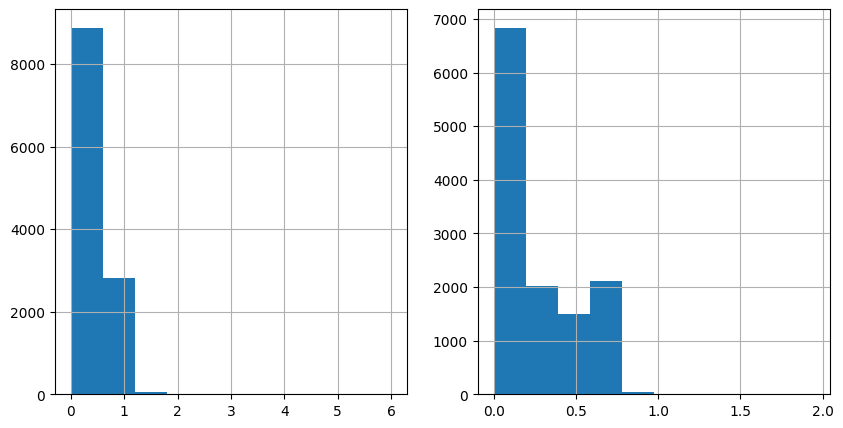

In [30]:
# see if log improves distribution of revolving, debt, income, real estate

fig, ax = plt.subplots(1,2, figsize=(10,5))
df2['RevolvingUtilizationOfUnsecuredLines'].hist(ax=ax[0])
np.log(df['RevolvingUtilizationOfUnsecuredLines']+1).hist(ax=ax[1])

In [31]:
df2['logRevolving'] = np.log(df2['RevolvingUtilizationOfUnsecuredLines'] + 1)

<Axes: >

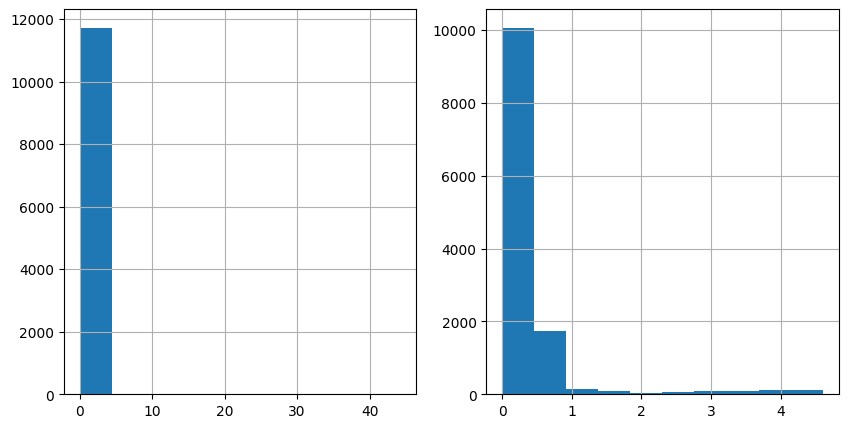

In [32]:

fig, ax = plt.subplots(1,2, figsize=(10,5))
df2['DebtRatio'].hist(ax=ax[0])
np.log(df['DebtRatio']+1).hist(ax=ax[1])

In [33]:
df2['logDebtRatio'] = np.log(df2['DebtRatio'] + 1)

<Axes: >

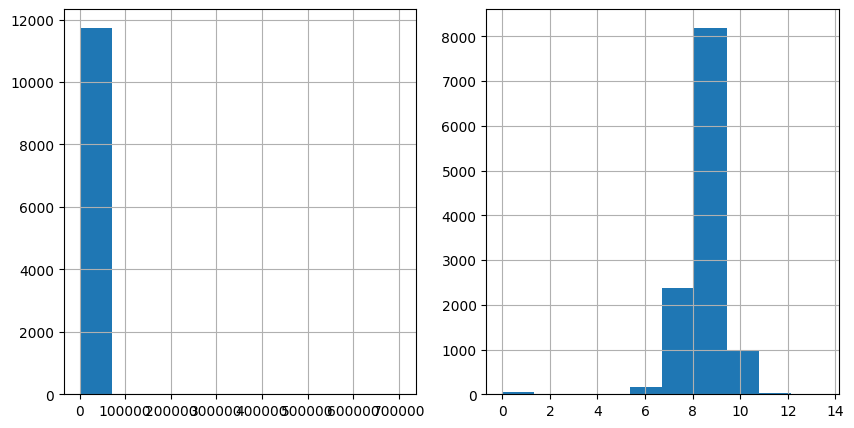

In [34]:

fig, ax = plt.subplots(1,2, figsize=(10,5))
df2['MonthlyIncome'].hist(ax=ax[0])
np.log(df['MonthlyIncome']+1).hist(ax=ax[1])

In [35]:
df2['logIncome'] = np.log(df2['MonthlyIncome'] + 1)

<Axes: >

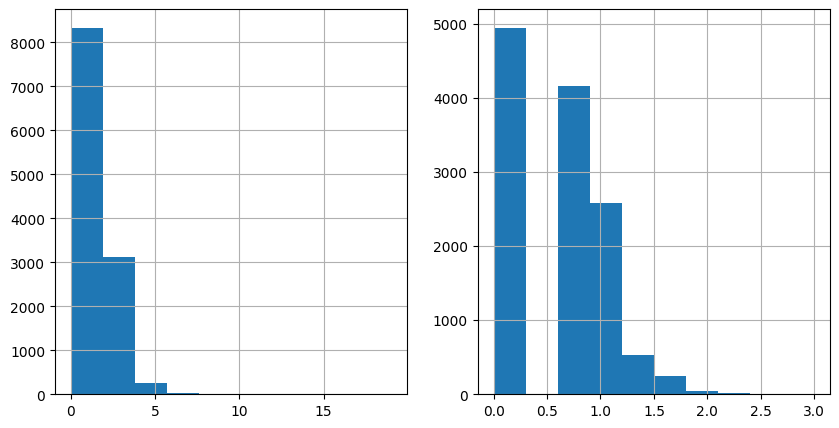

In [36]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
df2['NumberRealEstateLoansOrLines'].hist(ax=ax[0])
np.log(df['NumberRealEstateLoansOrLines']+1).hist(ax=ax[1])

In [37]:
df2['logRealEstateLoans'] = np.log(df2['NumberRealEstateLoansOrLines'] + 1)

<Axes: >

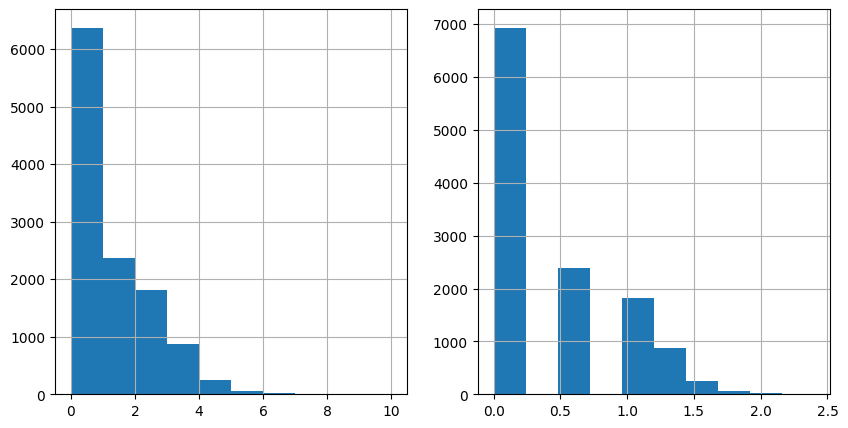

In [38]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
df2['NumberOfDependents'].hist(ax=ax[0])
np.log(df['NumberOfDependents']+1).hist(ax=ax[1])

hmmmm.....

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

classification
target = SeriousDlqin2yrs

In [39]:
target = 'SeriousDlqin2yrs'

### #1.3
Pinta la distribución de frecuencias del target y coméntala

In [40]:
df[target].value_counts(True)

0    0.931084
1    0.068916
Name: SeriousDlqin2yrs, dtype: float64

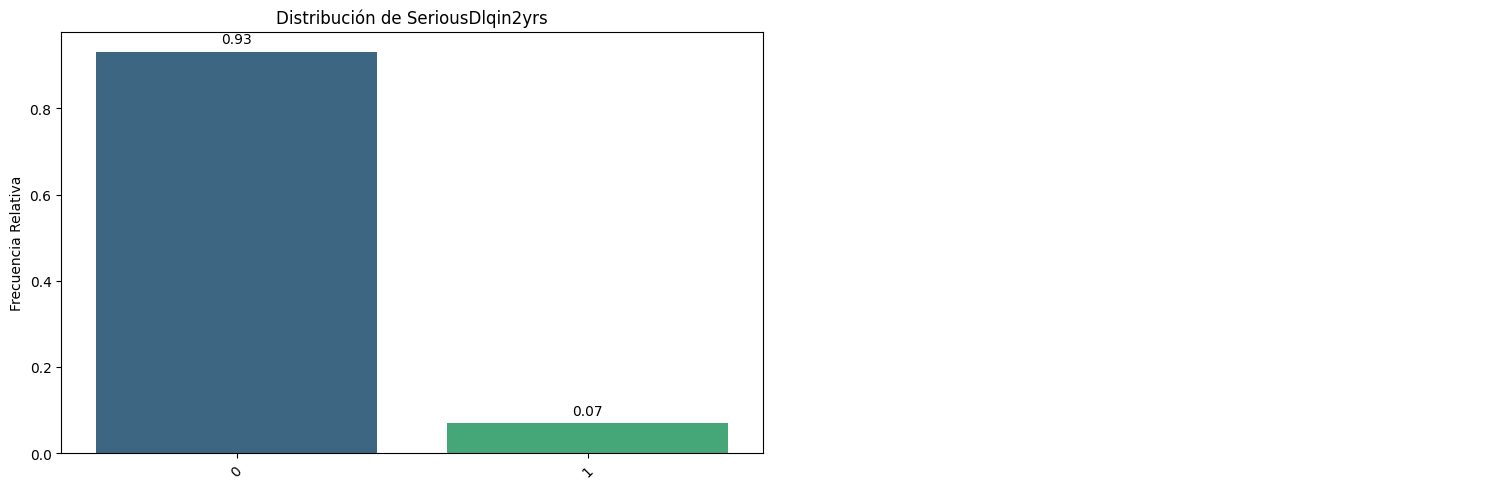

In [41]:
booty.pinta_distribucion_categoricas(df, [target], mostrar_valores=True, relativa=True)

- Very unbalanced
    - try some oversampling
    - want to catch the 1s so may need some more 1s in the dataset to improve the model

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11768 entries, 0 to 12536
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11768 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11768 non-null  float64
 2   age                                   11768 non-null  int64  
 3   DebtRatio                             11768 non-null  float64
 4   MonthlyIncome                         11768 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       11768 non-null  int64  
 6   NumberRealEstateLoansOrLines          11768 non-null  int64  
 7   NumberOfDependents                    11768 non-null  float64
 8   30-59DaysPast                         11768 non-null  int64  
 9   60-89DaysPast                         11768 non-null  int64  
 10  90DaysPast                            11768 non-null  int64  
 11  logRevolving   

In [43]:
log_features = ['logDebtRatio','logIncome','logRealEstateLoans','logRevolving']

In [44]:
num_features.append('NumberOfDependents')

In [45]:
num_features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents']

In [46]:
cat_features= [col for col in df2.columns if col != target and col not in num_features and col not in log_features]

In [47]:
cat_features

['30-59DaysPast', '60-89DaysPast', '90DaysPast']

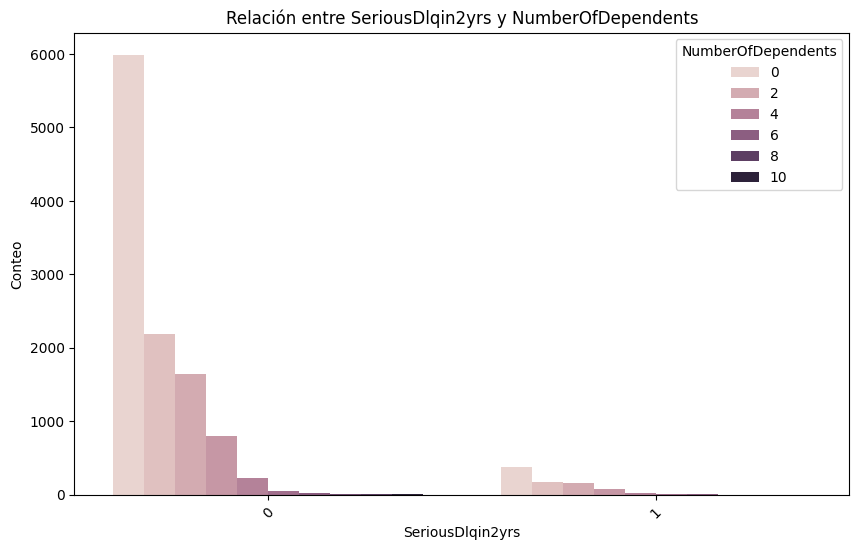

In [48]:
booty.plot_categorical_relationship_fin(df2, target, 'NumberOfDependents')

In [49]:
num_features.remove('NumberOfDependents')

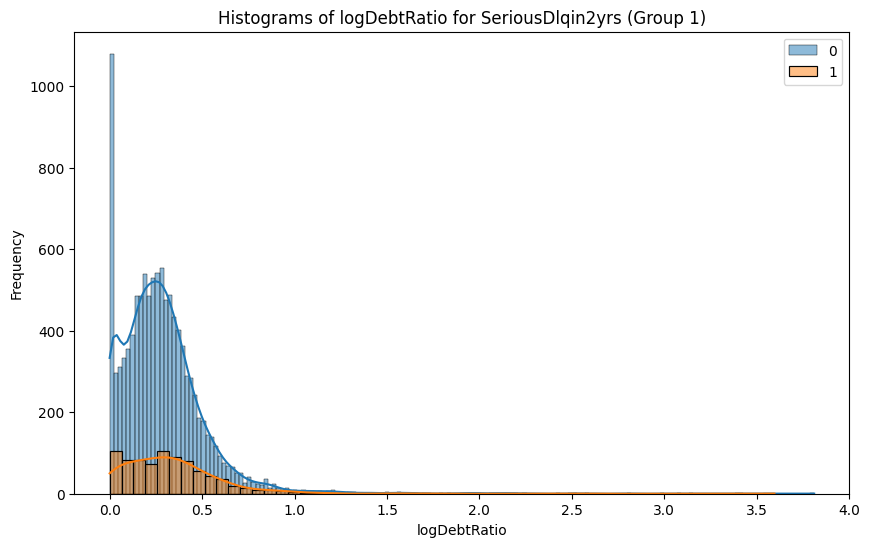

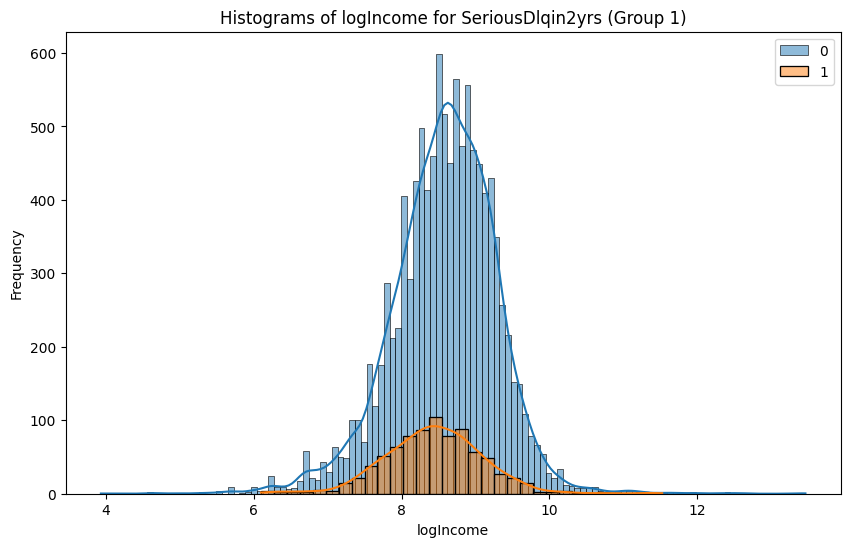

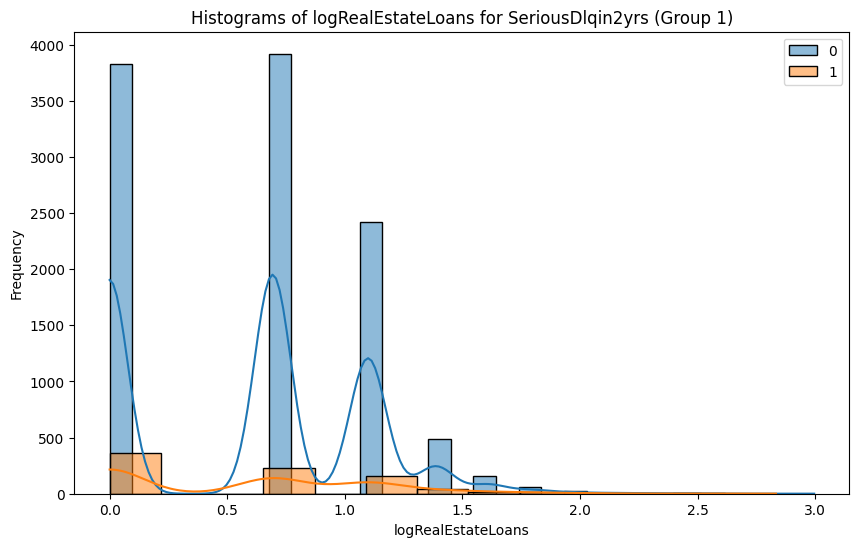

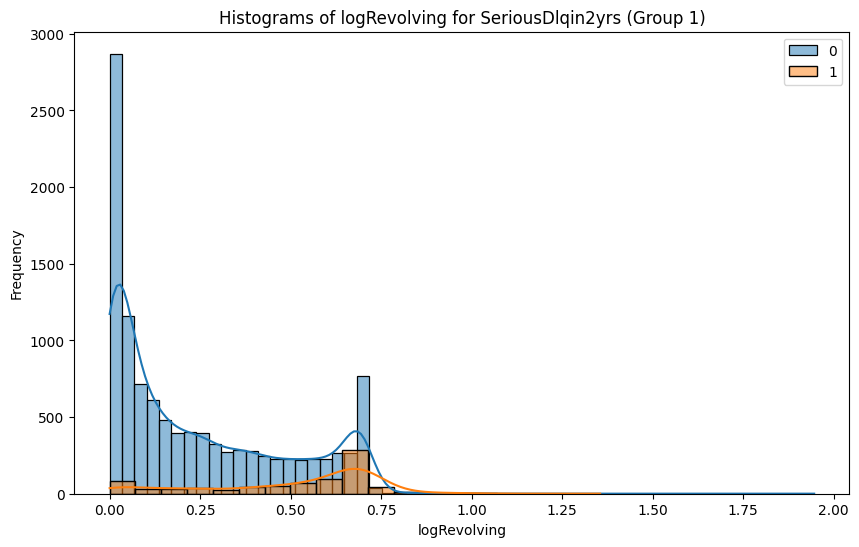

In [50]:
for col in log_features:
    booty.plot_grouped_histograms(df2, cat_col=target, num_col=col, group_size=2)

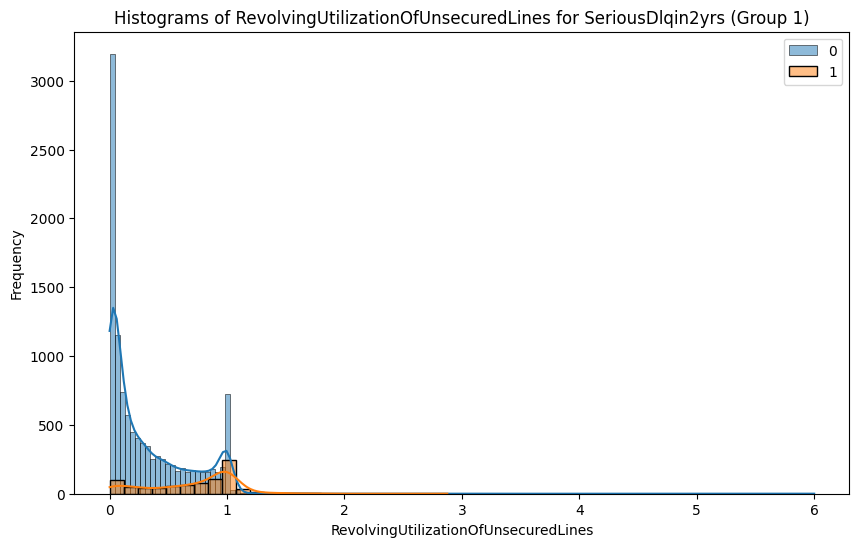

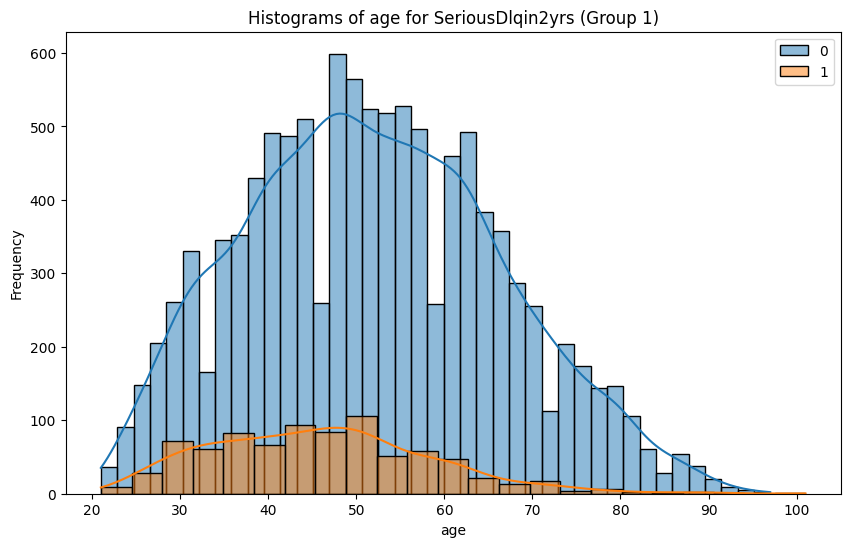

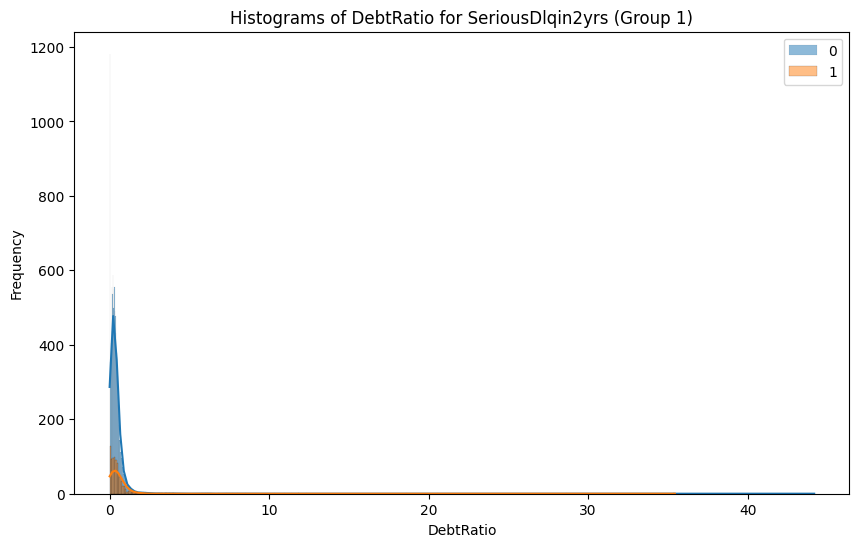

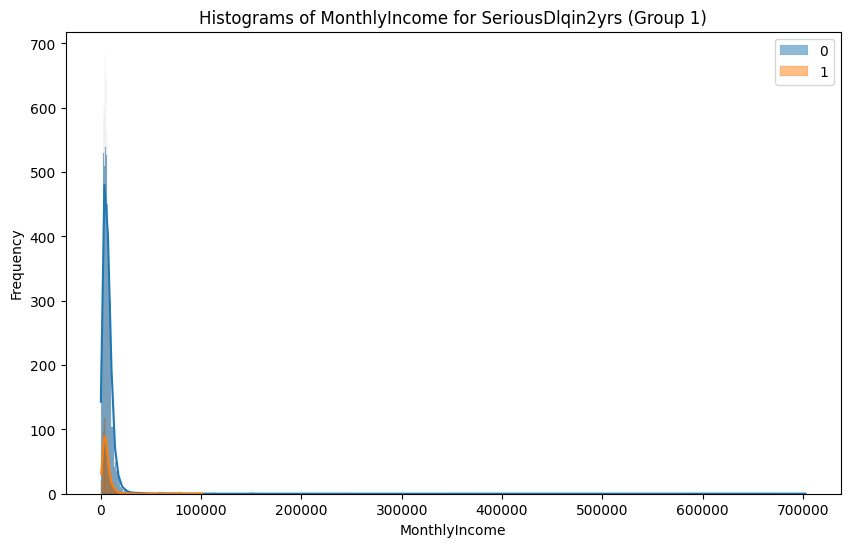

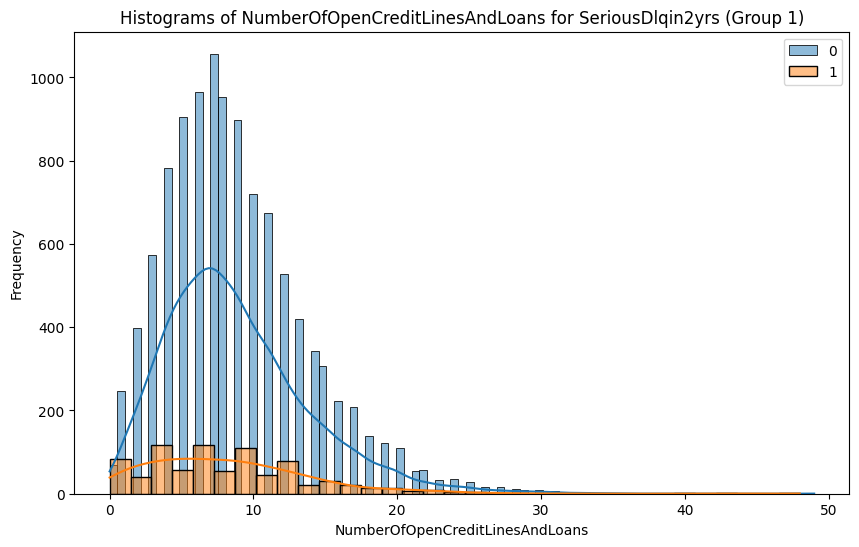

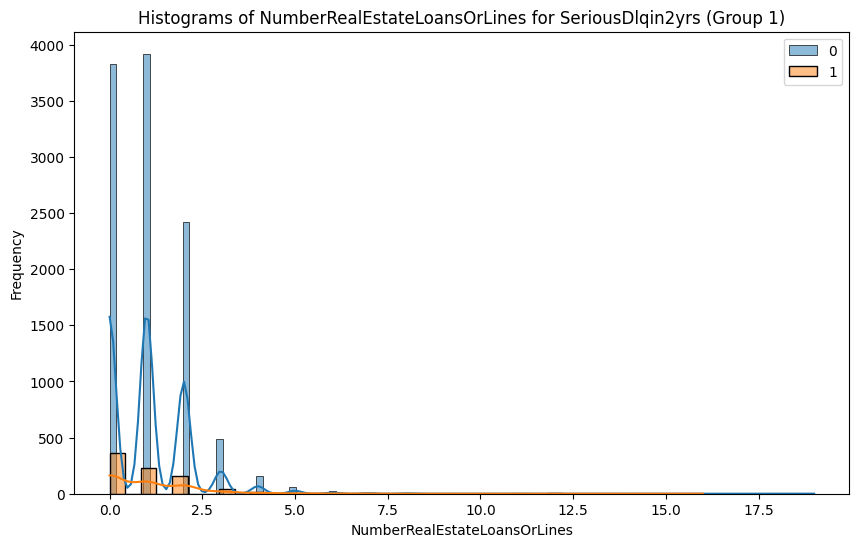

In [51]:
for col in num_features:
    booty.plot_grouped_histograms(df2, cat_col=target, num_col=col, group_size=2)

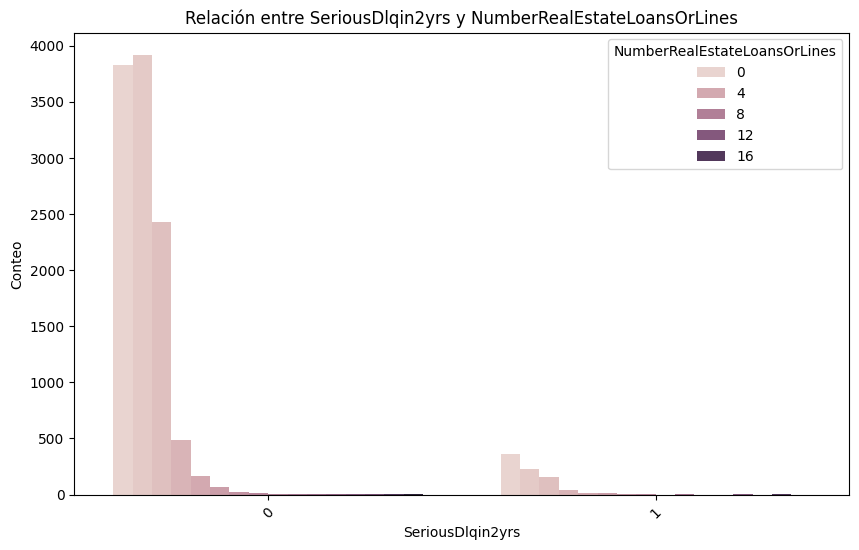

In [52]:
booty.plot_categorical_relationship_fin(df2, target, 'NumberRealEstateLoansOrLines')

In [53]:
num_features.remove('NumberRealEstateLoansOrLines')

In [54]:
num_features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans']

In [55]:
cat_features.append('NumberRealEstateLoansOrLines')

In [69]:
cat_features.append('NumberOfDependents')

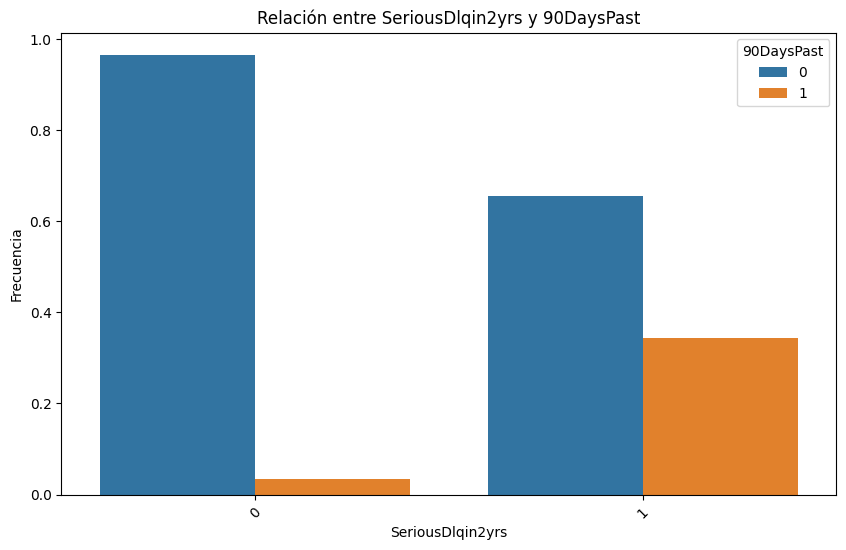

In [57]:
booty.plot_categorical_relationship_fin(df2, target, '90DaysPast', relative_freq=True)

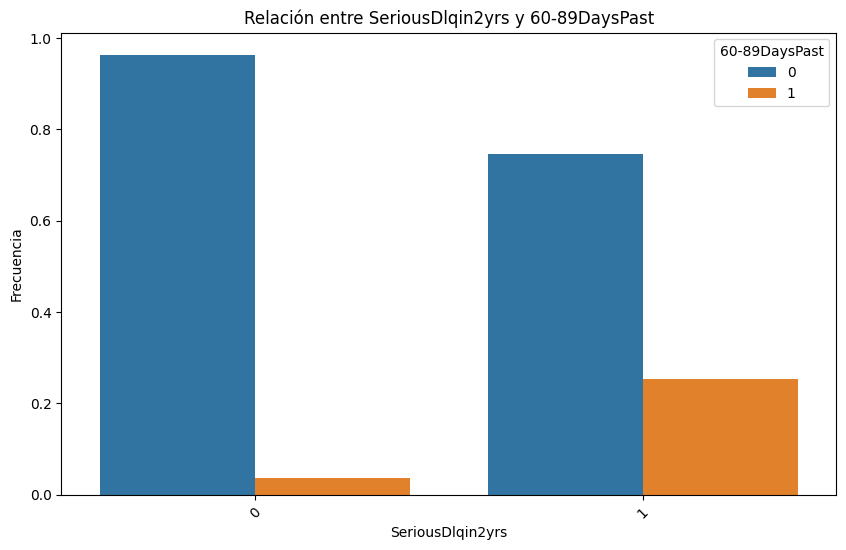

In [58]:
booty.plot_categorical_relationship_fin(df2, target, '60-89DaysPast', relative_freq=True)

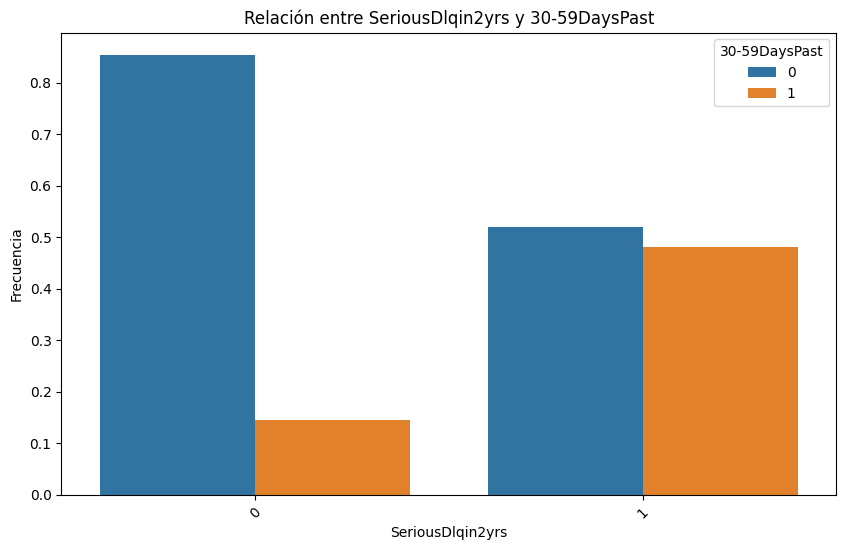

In [59]:
booty.plot_categorical_relationship_fin(df2, target, '30-59DaysPast', relative_freq=True)

In [60]:
dummies = ['NumberOfDependents','NumberRealEstateLoansOrLines']

In [64]:
df2[dummies] = df2[dummies].astype('category')
dums = pd.get_dummies(df2[dummies])
dums
df2 = pd.concat([df2, dums], axis=1)

In [65]:
df2

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,30-59DaysPast,60-89DaysPast,...,NumberRealEstateLoansOrLines_6,NumberRealEstateLoansOrLines_7,NumberRealEstateLoansOrLines_8,NumberRealEstateLoansOrLines_9,NumberRealEstateLoansOrLines_10,NumberRealEstateLoansOrLines_11,NumberRealEstateLoansOrLines_12,NumberRealEstateLoansOrLines_13,NumberRealEstateLoansOrLines_16,NumberRealEstateLoansOrLines_19
0,0,0.081892,37,0.070709,5656.0,12,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.023413,74,0.209197,4870.0,9,1,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.000000,43,0.080784,5000.0,2,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.492754,44,0.412735,7333.0,4,2,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1.000000,63,0.000000,8333.0,3,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0.290216,5140.0,6,1,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
12533,0,0.036726,62,0.884985,5833.0,12,1,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
12534,0,0.120313,49,0.577676,6333.0,7,2,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
12535,0,0.252566,63,0.037640,14000.0,9,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df2, test_size=0.25, random_state=42)

In [71]:
train_set.columns.to_list()

['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents',
 '30-59DaysPast',
 '60-89DaysPast',
 '90DaysPast',
 'logRevolving',
 'logDebtRatio',
 'logIncome',
 'logRealEstateLoans',
 'NumberOfDependents_0.0',
 'NumberOfDependents_1.0',
 'NumberOfDependents_2.0',
 'NumberOfDependents_3.0',
 'NumberOfDependents_4.0',
 'NumberOfDependents_5.0',
 'NumberOfDependents_6.0',
 'NumberOfDependents_7.0',
 'NumberOfDependents_8.0',
 'NumberOfDependents_10.0',
 'NumberRealEstateLoansOrLines_0',
 'NumberRealEstateLoansOrLines_1',
 'NumberRealEstateLoansOrLines_2',
 'NumberRealEstateLoansOrLines_3',
 'NumberRealEstateLoansOrLines_4',
 'NumberRealEstateLoansOrLines_5',
 'NumberRealEstateLoansOrLines_6',
 'NumberRealEstateLoansOrLines_7',
 'NumberRealEstateLoansOrLines_8',
 'NumberRealEstateLoansOrLines_9',
 'NumberRealEstateLoansOrLines_10',
 'NumberRealEstateLoansOrLi

In [72]:
cat_features = ['NumberOfDependents_0.0',
                'NumberOfDependents_1.0',
                'NumberOfDependents_2.0',
                'NumberOfDependents_3.0',
                'NumberOfDependents_4.0',
                'NumberOfDependents_5.0',
                'NumberOfDependents_6.0',
                'NumberOfDependents_7.0',
                'NumberOfDependents_8.0',
                'NumberOfDependents_10.0',
                'NumberRealEstateLoansOrLines_0',
                'NumberRealEstateLoansOrLines_1',
                'NumberRealEstateLoansOrLines_2',
                'NumberRealEstateLoansOrLines_3',
                'NumberRealEstateLoansOrLines_4',
                'NumberRealEstateLoansOrLines_5',
                'NumberRealEstateLoansOrLines_6',
                'NumberRealEstateLoansOrLines_7',
                'NumberRealEstateLoansOrLines_8',
                'NumberRealEstateLoansOrLines_9',
                'NumberRealEstateLoansOrLines_10',
                'NumberRealEstateLoansOrLines_11',
                'NumberRealEstateLoansOrLines_12',
                'NumberRealEstateLoansOrLines_13',
                'NumberRealEstateLoansOrLines_16',
                'NumberRealEstateLoansOrLines_19',
                '30-59DaysPast',
                '60-89DaysPast',
                '90DaysPast']

In [67]:
num_features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans']

In [73]:
log_features

['logDebtRatio', 'logIncome', 'logRealEstateLoans', 'logRevolving']

In [76]:
X_train_log = train_set[log_features+cat_features+['age']]
y_train = train_set[target]

X_test_log = test_set[log_features+cat_features+['age']]
y_test = test_set[target]

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_log_scaled = scaler.fit_transform(X_train_log[log_features +['age']])
X_test_log_scaled = scaler.transform(X_train_log[log_features +['age']])

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

loreg_log = LogisticRegression()
rfor_log = RandomForestClassifier(random_state=42, max_depth=5)
knn_log = KNeighborsClassifier(n_neighbors=5)

---
---

In [90]:
loreg_log.fit(X_train_log_scaled, y_train)

LogisticRegression()

In [91]:
from sklearn.metrics import classification_report

y_preds_train = loreg_log.predict(X_train_log_scaled)
print("Classification Report: Logistic Regression Train")
print(classification_report(y_train, y_preds_train))

Classification Report: Logistic Regression Train
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8218
           1       0.25      0.00      0.01       608

    accuracy                           0.93      8826
   macro avg       0.59      0.50      0.49      8826
weighted avg       0.88      0.93      0.90      8826



---

In [92]:
rfor_log.fit(X_train_log_scaled, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [93]:
y_preds_train = rfor_log.predict(X_train_log_scaled)
print("Classification Report: Random Forest Train")
print(classification_report(y_train, y_preds_train))

Classification Report: Random Forest Train
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8218
           1       1.00      0.01      0.02       608

    accuracy                           0.93      8826
   macro avg       0.97      0.50      0.49      8826
weighted avg       0.94      0.93      0.90      8826



---

In [94]:
knn_log.fit(X_train_log_scaled, y_train)

KNeighborsClassifier()

In [95]:
y_preds_train = knn_log.predict(X_train_log_scaled)
print("Classification Report: KNN Train")
print(classification_report(y_train, y_preds_train))

Classification Report: KNN Train
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      8218
           1       0.70      0.17      0.27       608

    accuracy                           0.94      8826
   macro avg       0.82      0.58      0.62      8826
weighted avg       0.93      0.94      0.92      8826



---

In [97]:
from sklearn.model_selection import cross_val_score

bal_acc_scores_minmax = []
for k in range(1,21):
    model = KNeighborsClassifier(n_neighbors=k)
    bal_acc = np.mean(cross_val_score(model, X_train_log_scaled, y_train, cv=5, scoring='balanced_accuracy'))
    bal_acc_scores_minmax.append(bal_acc)
    print(f'For K = {k}, mean recall: {bal_acc}')
print(f'Best K value: {(np.argmax(bal_acc_scores_minmax)) + 1}')

For K = 1, mean recall: 0.5611345258166826
For K = 2, mean recall: 0.5143452820094161
For K = 3, mean recall: 0.5369361474421781
For K = 4, mean recall: 0.5060015351585674
For K = 5, mean recall: 0.5142862680424058
For K = 6, mean recall: 0.5026130011929784
For K = 7, mean recall: 0.5088358867409014
For K = 8, mean recall: 0.5029019900048501
For K = 9, mean recall: 0.509604645363668
For K = 10, mean recall: 0.5021295227804952
For K = 11, mean recall: 0.5047525487818918
For K = 12, mean recall: 0.5007335245426968
For K = 13, mean recall: 0.5062549800356096
For K = 14, mean recall: 0.5019926467939817
For K = 15, mean recall: 0.5023255898540719
For K = 16, mean recall: 0.5012878920362701
For K = 17, mean recall: 0.5016884735188766
For K = 18, mean recall: 0.5006438904850394
For K = 19, mean recall: 0.5012878179921427
For K = 20, mean recall: 0.5015920653113752
Best K value: 1


In [99]:
df3 = df.copy()

In [104]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   DebtRatio                             11816 non-null  float64
 4   MonthlyIncome                         11816 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 6   NumberRealEstateLoansOrLines          11816 non-null  int64  
 7   NumberOfDependents                    11816 non-null  float64
 8   30-59DaysPast                         11816 non-null  int64  
 9   60-89DaysPast                         11816 non-null  int64  
 10  90DaysPast                            11816 non-null  int64  
dtypes: float64(4), 

In [101]:
df3.dropna(axis=0, inplace=True)

In [102]:
df3['30-59DaysPast'] = df3['NumberOfTime30-59DaysPastDueNotWorse'].apply(lambda x: 1 if x > 0 else 0)
df3['60-89DaysPast'] = df3['NumberOfTime60-89DaysPastDueNotWorse'].apply(lambda x: 1 if x > 0 else 0)
df3['90DaysPast'] = df3['NumberOfTimes90DaysLate'].apply(lambda x: 1 if x > 0 else 0)
droppers = ['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate']
df3.drop(droppers, axis=1, inplace=True)

In [105]:
num_feats = ['RevolvingUtilizationOfUnsecuredLines','age','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfDependents']
cat_feats = [col for col in df3 if col != target and col not in num_feats]

In [106]:
train2, test2 = train_test_split(df3, test_size=0.25, random_state=42)

In [107]:
X_train2 = train2[cat_feats+num_feats]
y_train2 = train2[target]

X_test2 = test2[cat_feats+num_feats]
y_test2 = test2[target]

In [108]:
bal_acc_scores_minmax = []
for k in range(1,21):
    model = KNeighborsClassifier(n_neighbors=k)
    bal_acc = np.mean(cross_val_score(model, X_train2, y_train2, cv=5, scoring='balanced_accuracy'))
    bal_acc_scores_minmax.append(bal_acc)
    print(f'For K = {k}, mean recall: {bal_acc}')
print(f'Best K value: {(np.argmax(bal_acc_scores_minmax)) + 1}')

For K = 1, mean recall: 0.5115083607470077
For K = 2, mean recall: 0.5003634301227778
For K = 3, mean recall: 0.5016905667654845
For K = 4, mean recall: 0.5000243939655685
For K = 5, mean recall: 0.5030253930146179
For K = 6, mean recall: 0.49975739194686986
For K = 7, mean recall: 0.4995147102980918
For K = 8, mean recall: 0.5
For K = 9, mean recall: 0.5006245231714235
For K = 10, mean recall: 0.5
For K = 11, mean recall: 0.5
For K = 12, mean recall: 0.5
For K = 13, mean recall: 0.5
For K = 14, mean recall: 0.5
For K = 15, mean recall: 0.5
For K = 16, mean recall: 0.5
For K = 17, mean recall: 0.5
For K = 18, mean recall: 0.5
For K = 19, mean recall: 0.5
For K = 20, mean recall: 0.5
Best K value: 1


In [109]:
bal_acc_scores_minmax = []
for k in range(1,21):
    model = RandomForestClassifier(max_depth = k)
    bal_acc = np.mean(cross_val_score(model, X_train2, y_train2, cv=5, scoring='balanced_accuracy'))
    bal_acc_scores_minmax.append(bal_acc)
    print(f'For K = {k}, mean recall: {bal_acc}')
print(f'Best K value: {(np.argmax(bal_acc_scores_minmax)) + 1}')

For K = 1, mean recall: 0.5
For K = 2, mean recall: 0.5
For K = 3, mean recall: 0.5047174240497663
For K = 4, mean recall: 0.5247539256845022
For K = 5, mean recall: 0.5313300248636633
For K = 6, mean recall: 0.5515354890968184
For K = 7, mean recall: 0.5692001656723151
For K = 8, mean recall: 0.5740963094859609
For K = 9, mean recall: 0.5774974510640515
For K = 10, mean recall: 0.5809950943418692
For K = 11, mean recall: 0.5848342166293411
For K = 12, mean recall: 0.5799788172617262
For K = 13, mean recall: 0.5881040498002328
For K = 14, mean recall: 0.587982653779108
For K = 15, mean recall: 0.5879760972619298
For K = 16, mean recall: 0.5902937256310489
For K = 17, mean recall: 0.5877286911991175
For K = 18, mean recall: 0.5840045556068881
For K = 19, mean recall: 0.5844534860670665
For K = 20, mean recall: 0.5811540341607426
Best K value: 16


- pretty poor scores
- i'm sure its the feature selection/treatment thats affecting performance.
    - i feel like i understand during the videos and in live sessions, but still get lost when i have to make decisions about what to do with features. bit frustrating!

In [119]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(n_estimators=5,learning_rate=0.3)
xgb_clf.fit(X_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [120]:
y_preds_train = xgb_clf.predict(X_train2)
print(classification_report(y_train2, y_preds_train))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8243
           1       0.86      0.25      0.38       619

    accuracy                           0.94      8862
   macro avg       0.90      0.62      0.68      8862
weighted avg       0.94      0.94      0.93      8862



In [131]:
bal_acc_scores = {}
for n in range(1,21):
    for l in np.arange(0.1,0.7, 0.1):
        model = xgb.XGBClassifier(n_estimators = n, learning_rate=l, max_depth=a)
        bal_acc = np.mean(cross_val_score(model, X_train2, y_train2, cv=5, scoring='balanced_accuracy'))
        bal_acc_scores[(n,l)] = bal_acc
        print(f'For n_estimator = {n}, learning_rate = {round(l,1)}, mean recall: {bal_acc}')

best_params = max(bal_acc_scores, key=bal_acc_scores.get)
best_score = bal_acc_scores[best_params]

print(f'best: n_estimator = {best_params[0]}, learning_rate = {best_params[1]}')
print(f'Best Score = {best_score}')

For n_estimator = 1, learning_rate = 0.1, mean recall: 0.5
For n_estimator = 1, learning_rate = 0.2, mean recall: 0.5
For n_estimator = 1, learning_rate = 0.3, mean recall: 0.5
For n_estimator = 1, learning_rate = 0.4, mean recall: 0.5062696844617461
For n_estimator = 1, learning_rate = 0.5, mean recall: 0.5291323055477409
For n_estimator = 1, learning_rate = 0.6, mean recall: 0.5631522201976811
For n_estimator = 2, learning_rate = 0.1, mean recall: 0.5
For n_estimator = 2, learning_rate = 0.2, mean recall: 0.5
For n_estimator = 2, learning_rate = 0.3, mean recall: 0.5078219080759021
For n_estimator = 2, learning_rate = 0.4, mean recall: 0.5437004311887363
For n_estimator = 2, learning_rate = 0.5, mean recall: 0.5482128645787687
For n_estimator = 2, learning_rate = 0.6, mean recall: 0.5763262374362965
For n_estimator = 3, learning_rate = 0.1, mean recall: 0.5
For n_estimator = 3, learning_rate = 0.2, mean recall: 0.5031044840261358
For n_estimator = 3, learning_rate = 0.3, mean recall:

In [132]:
xgb_best = xgb.XGBClassifier(n_estimators=13, learning_rate=0.5)
xgb_best.fit(X_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=13, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [134]:
y_pred = xgb_best.predict(X_train2)
print(classification_report(y_train2, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8243
           1       0.89      0.42      0.57       619

    accuracy                           0.96      8862
   macro avg       0.92      0.71      0.77      8862
weighted avg       0.95      0.96      0.95      8862



In [135]:
y_train2.value_counts()

0    8243
1     619
Name: SeriousDlqin2yrs, dtype: int64

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
rfor_smote = RandomForestClassifier(max_depth=5, random_state=42)
rfor_smote.fit(X_train_smote, y_train_smote)

In [136]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train2_smote, y_train2_smote = smote.fit_resample(X_train2, y_train2)

xgb_smote = xgb.XGBClassifier(n_estimators=13, learning_rate=0.5)
xgb_smote.fit(X_train2_smote, y_train2_smote)

y_pred = xgb_smote.predict(X_test2)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2743
           1       0.22      0.34      0.27       211

    accuracy                           0.87      2954
   macro avg       0.58      0.62      0.60      2954
weighted avg       0.90      0.87      0.88      2954



- smote didnt make much difference

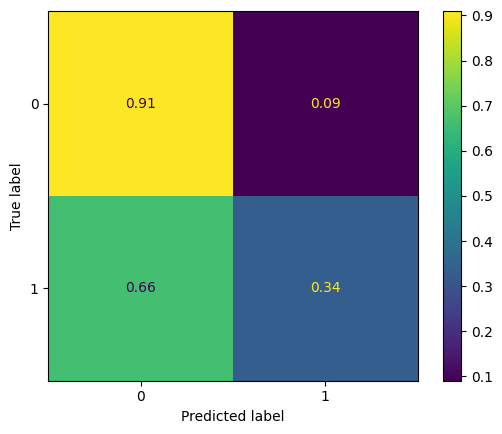

In [137]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test2, xgb_smote.predict(X_test2), normalize='true')

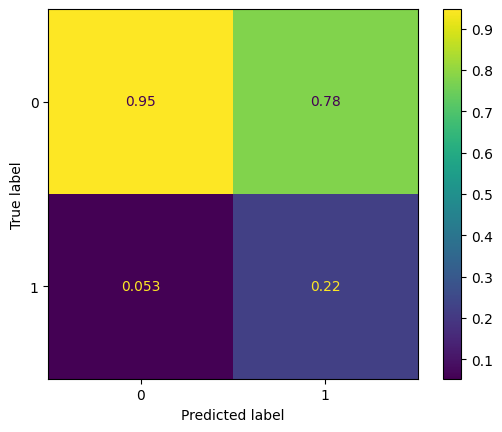

In [138]:
ConfusionMatrixDisplay.from_predictions(y_test2, xgb_smote.predict(X_test2), normalize='pred')

In [139]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(max_depth=5, verbose=False, auto_class_weights='Balanced')

np.mean(cross_val_score(cat, X_train2, y_train2, cv=5, scoring='balanced_accuracy'))

0.7381733240826479

In [140]:
cat.fit(X_train2, y_train2)

In [142]:
y_pred = cat.predict(X_test2)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2743
           1       0.25      0.58      0.35       211

    accuracy                           0.84      2954
   macro avg       0.61      0.72      0.63      2954
weighted avg       0.91      0.84      0.87      2954



In [144]:
cat_smote = CatBoostClassifier(max_depth=5, verbose=False, auto_class_weights='Balanced')

cat_smote.fit(X_train2_smote, y_train2_smote)
y_pred = cat_smote.predict(X_test2)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2743
           1       0.28      0.35      0.31       211

    accuracy                           0.89      2954
   macro avg       0.61      0.64      0.62      2954
weighted avg       0.90      0.89      0.89      2954



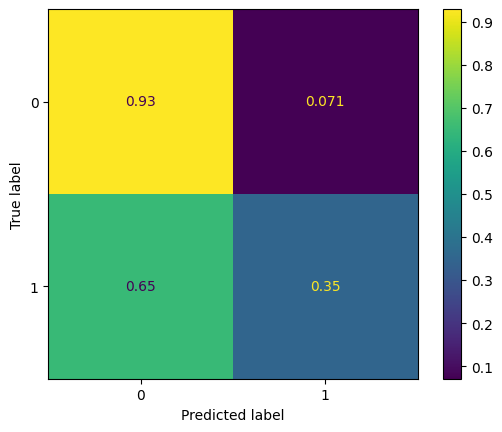

In [145]:
ConfusionMatrixDisplay.from_predictions(y_test2, cat_smote.predict(X_test2), normalize='true')

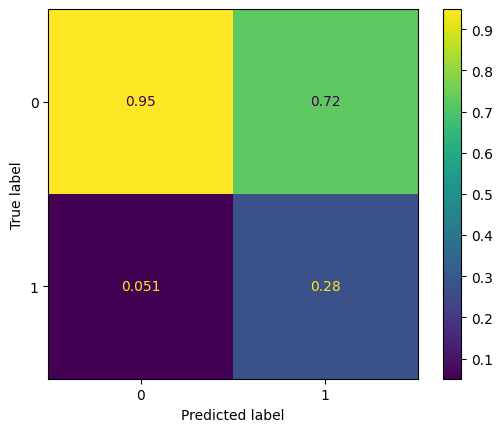

In [146]:
ConfusionMatrixDisplay.from_predictions(y_test2, cat_smote.predict(X_test2), normalize='pred')

In [147]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   DebtRatio                             11816 non-null  float64
 4   MonthlyIncome                         11816 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 6   NumberRealEstateLoansOrLines          11816 non-null  int64  
 7   NumberOfDependents                    11816 non-null  float64
 8   30-59DaysPast                         11816 non-null  int64  
 9   60-89DaysPast                         11816 non-null  int64  
 10  90DaysPast                            11816 non-null  int64  
dtypes: float64(4), 

In [153]:
num_features = ['RevolvingUtilizationOfUnsecuredLines','age','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfDependents']

In [154]:
df3_scaled = df3.copy()

train3, test3 = train_test_split(df3_scaled, test_size=0.2, random_state=42)

X_train_scaled = train3.drop(target, axis=1)
y_train = train3[target]

X_test_scaled = test3.drop(target, axis=1)
y_test = test3[target]


In [155]:
X_train_scaled[num_features] = scaler.fit_transform(X_train_scaled[num_features])
X_test_scaled[num_features] = scaler.transform(X_test_scaled[num_features])

In [156]:
smote = SMOTE(random_state=42)
X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


In [158]:
cat_scaled_smote = CatBoostClassifier(max_depth=5, verbose=False, auto_class_weights='Balanced')

cat_scaled_smote.fit(X_train_scaled_smote, y_train_smote)
y_pred = cat_scaled_smote.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2197
           1       0.46      0.28      0.35       167

    accuracy                           0.93      2364
   macro avg       0.71      0.63      0.65      2364
weighted avg       0.91      0.93      0.92      2364

